In [24]:
import pandas as pd
energy_df=pd.read_csv('datos.csv', sep=';', usecols=['datetime','name','value'])
energy_df      

,name,value,datetime
0,Demanda programada P48 total,20058.667,2023-01-01T00:00:00+01:00
1,Demanda programada P48 total,19237.725,2023-01-01T01:00:00+01:00
2,Demanda programada P48 total,18147.283,2023-01-01T02:00:00+01:00
3,Demanda programada P48 total,17038.350,2023-01-01T03:00:00+01:00
4,Demanda programada P48 total,16463.475,2023-01-01T04:00:00+01:00
...,...,...,...
47392,Generación medida Turbinación bombeo,477.756,2023-03-31T19:00:00+02:00
47393,Generación medida Turbinación bombeo,1435.662,2023-03-31T20:00:00+02:00
47394,Generación medida Turbinación bombeo,2179.952,2023-03-31T21:00:00+02:00
47395,Generación medida Turbinación bombeo,1957.031,2023-03-31T22:00:00+02:00


In [25]:
demand_removed_df=energy_df[energy_df['name'].str.startswith('Demanda programada')==False]
demand_removed_df


,name,value,datetime
19883,Generación medida Biogás,83.937,2023-01-01T00:00:00+01:00
19884,Generación medida Biogás,81.609,2023-01-01T01:00:00+01:00
19885,Generación medida Biogás,80.939,2023-01-01T02:00:00+01:00
19886,Generación medida Biogás,80.873,2023-01-01T03:00:00+01:00
19887,Generación medida Biogás,80.765,2023-01-01T04:00:00+01:00
...,...,...,...
47392,Generación medida Turbinación bombeo,477.756,2023-03-31T19:00:00+02:00
47393,Generación medida Turbinación bombeo,1435.662,2023-03-31T20:00:00+02:00
47394,Generación medida Turbinación bombeo,2179.952,2023-03-31T21:00:00+02:00
47395,Generación medida Turbinación bombeo,1957.031,2023-03-31T22:00:00+02:00


In [26]:
import plotly.express as px
#graph_df=demand_removed_df[demand_removed_df['datetime'].str.match('2023-01-01T')]
graph_df=demand_removed_df
demanda_df=graph_df[graph_df['name'].str.startswith('Demanda en consumo')]
demanda_df


,name,value,datetime
34996,Demanda en consumo,16742.660,2023-01-01T00:00:00+01:00
34997,Demanda en consumo,16204.409,2023-01-01T01:00:00+01:00
34998,Demanda en consumo,15222.482,2023-01-01T02:00:00+01:00
34999,Demanda en consumo,14354.542,2023-01-01T03:00:00+01:00
35000,Demanda en consumo,13792.577,2023-01-01T04:00:00+01:00
...,...,...,...
37150,Demanda en consumo,23926.935,2023-03-31T19:00:00+02:00
37151,Demanda en consumo,25246.008,2023-03-31T20:00:00+02:00
37152,Demanda en consumo,25697.425,2023-03-31T21:00:00+02:00
37153,Demanda en consumo,23695.177,2023-03-31T22:00:00+02:00


In [27]:
generacion_df=graph_df[graph_df['name'].str.startswith('Demanda en consumo')==False]
generacion_df

,name,value,datetime
19883,Generación medida Biogás,83.937,2023-01-01T00:00:00+01:00
19884,Generación medida Biogás,81.609,2023-01-01T01:00:00+01:00
19885,Generación medida Biogás,80.939,2023-01-01T02:00:00+01:00
19886,Generación medida Biogás,80.873,2023-01-01T03:00:00+01:00
19887,Generación medida Biogás,80.765,2023-01-01T04:00:00+01:00
...,...,...,...
47392,Generación medida Turbinación bombeo,477.756,2023-03-31T19:00:00+02:00
47393,Generación medida Turbinación bombeo,1435.662,2023-03-31T20:00:00+02:00
47394,Generación medida Turbinación bombeo,2179.952,2023-03-31T21:00:00+02:00
47395,Generación medida Turbinación bombeo,1957.031,2023-03-31T22:00:00+02:00


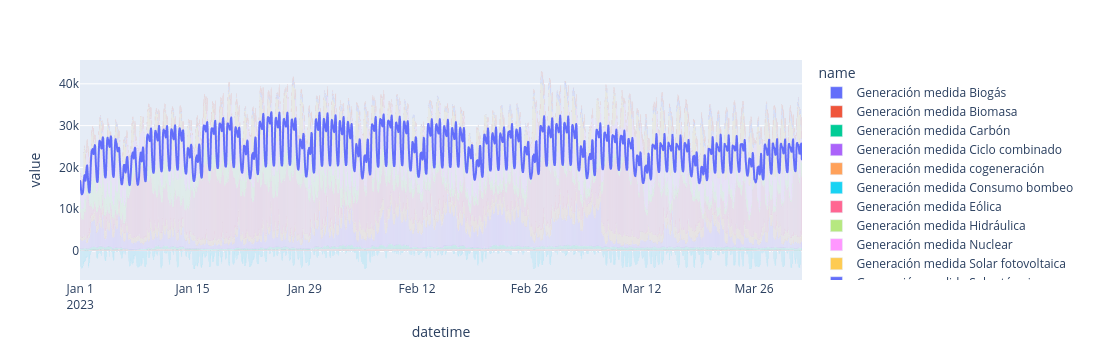

In [28]:
fig=px.bar(generacion_df, x='datetime', y='value', color='name')
fig.add_traces(list(px.line(demanda_df, x='datetime', y='value').select_traces()))
fig.show()